In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/Users/luciano/Downloads/final_withoutpictures.csv", sep=';')
data.head()

,id,year,length_in,width_in,height_in,base_engine_size_l,horsepower_hp,horsepower_rpm,torque_ft-lbs,torque_rpm,...,color_centroid [ 0 0 -127],color_centroid [127 127 0],color_centroid [ 0 -127 -127],color_centroid [127 0 0],color_centroid [255 128 128],color_centroid [255 0 128],color_centroid [ 127 0 -128],color_centroid [255 0 0],color_centroid [64 0 0],color_centroid [191 0 0]
0,200713717,2016,181.9,70.6,55.6,2.4,201.0,6800.0,180.0,3800.0,...,False,True,False,True,False,False,False,True,True,False
1,200727572,2016,181.9,70.6,55.6,2.4,201.0,6800.0,180.0,3800.0,...,False,True,False,True,False,False,False,True,True,False
2,200727571,2016,181.9,70.6,55.6,2.4,201.0,6800.0,180.0,3800.0,...,False,True,False,True,False,False,False,True,True,False
3,200727568,2016,181.9,70.6,55.6,2.4,201.0,6800.0,180.0,3800.0,...,False,False,False,True,False,False,False,True,True,False
4,200727569,2016,181.9,70.6,55.6,2.4,201.0,6800.0,180.0,3800.0,...,False,True,False,True,False,False,False,True,True,False


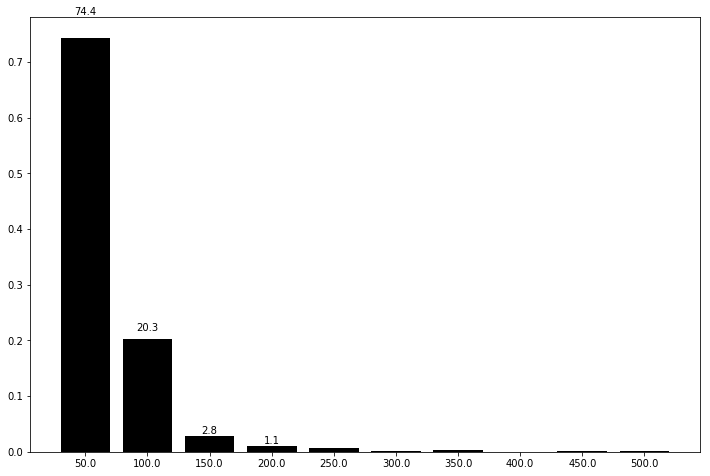

In [54]:
from matplotlib.ticker import FuncFormatter
counts, bins = np.histogram(data['price_msrp'], bins=range(0, data['price_msrp'].max(), 50000))
props = counts/len(data)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(range(len(props)), 0.001*bins[1:])
rects = plt.bar(range(len(props)), props, color='k')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if 100*float(height) > 1:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%.1f' % (100*float(height)),
                    ha='center', va='bottom')
autolabel(rects)

plt.show()

In [57]:
sum(data['price_msrp'] < 20000)/len(data)

0.048640167364016738

In [62]:
from collections import Counter

Counter(data['year']).most_common()

[(2016, 2768), (2017, 2673), (2018, 295)]

In [63]:
295/len(data)

0.05142956764295677

In [64]:
data.columns[:100]

Index(['id', 'year', 'length_in', 'width_in', 'height_in',
       'base_engine_size_l', 'horsepower_hp', 'horsepower_rpm',
       'torque_ft-lbs', 'torque_rpm', 'valves', 'fuel_tank_capacity_gal',
       'basic_year', 'basic_mile', 'drivetrain_year', 'drivetrain_mile',
       'wheels_size', 'price_msrp', 'body_type_convertible', 'body_type_coupe',
       'body_type_hatchback', 'body_type_minivan', 'body_type_sedan',
       'body_type_suv', 'body_type_truck', 'body_type_van', 'body_type_wagon',
       'body_type_nan', 'cam_type_double overhead cam (dohc)',
       'cam_type_overhead valves (ohv)', 'cam_type_single overhead cam (sohc)',
       'cam_type_nan', 'class_compact car', 'class_compact crossover suv',
       'class_compact mpv', 'class_compact suv', 'class_full-size car',
       'class_full-size crossover suv', 'class_full-size pickup truck',
       'class_full-size suv', 'class_full-size van', 'class_grand tourer',
       'class_mid-size car', 'class_mid-size crossover suv',
   

In [66]:
data['make_bmw'].sum()/len(data)

0.037133891213389121